In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('LR.csv')
df.head()

,YearsExperience,Salary(thousand)
0,1.1,39
1,1.3,46
2,1.5,37
3,2.0,43
4,2.2,39


In [ ]:
mean_yoe = sum(df['YearsExperience']) / float(len(df['YearsExperience']))
mean_salary = sum(df['Salary(thousand)']) / float(len(df['Salary(thousand)']))
mean_yoe,mean_salary

(5.3133333333333335, 75.5)

In [ ]:
def variance(values, mean):
    return sum([(val-mean)**2 for val in values])
variance_yoe, variance_salary = variance(df['YearsExperience'], mean_yoe), variance(df['Salary(thousand)'], mean_salary)
variance_yoe , variance_salary

(233.55466666666663, 21695.5)

In [ ]:
def covariance(yearsexperience, mean_yoe, salary , mean_salary):
    covariance = 0.0
    for i in range(len(yearsexperience)):
        covariance = covariance + (yearsexperience[i] - mean_yoe) * (salary[i] - mean_salary)
    return covariance
covariance_yoe_salary = covariance(df['YearsExperience'],mean_yoe,df['Salary(thousand)'],mean_salary)
covariance_yoe_salary

2201.5

In [ ]:
m = covariance_yoe_salary/ variance_yoe
c = mean_salary - m * mean_yoe
m,c

(9.426058710023636, 25.416208054074417)

In [ ]:
from numpy.ma.core import append
salary_pred = []
for i in df['YearsExperience']:
  y_pred = round((m*i + c),2)
  salary_pred.append(y_pred)
salary_pred

[35.78,
 37.67,
 39.56,
 44.27,
 46.15,
 52.75,
 53.69,
 55.58,
 55.58,
 60.29,
 62.18,
 63.12,
 63.12,
 64.06,
 67.83,
 71.6,
 73.49,
 75.37,
 81.03,
 81.97,
 89.51,
 92.34,
 99.88,
 102.71,
 107.42,
 110.25,
 114.96,
 115.91,
 122.5,
 124.39]

In [ ]:
sst = 0
for i in df['Salary(thousand)']:
  q = (i - mean_salary)**2
  sst += q
print(sst)

21695.5


In [ ]:
ssr = 0
for i in salary_pred:
  w = (i - mean_salary)**2
  ssr += w
print(ssr)

20751.139200000005


In [ ]:
r_sqr_m = ssr/sst
r_sqr_m

0.9564720425894773

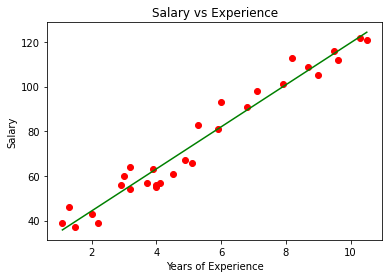

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'], df['Salary(thousand)'], color = "red")
plt.plot(df['YearsExperience'], salary_pred, color = "green")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

FROM SK-LEARN

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Pulkit Sir/Linear Regression/LR.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 53.25233033, 101.57316777,  72.76651468, 106.21940214,
       113.65337713,  74.62500843, 122.94584587,  62.54479907,
        88.56371154,  52.32308346])

In [ ]:
from sklearn.metrics import r2_score
r_sqr_s = r2_score(y_test, y_pred)
r_sqr_s

0.9408772569915976

Compairing R Square of both the Methods

In [ ]:
print("R Score from manual formulation is:", r_sqr_m)
print("R Score from Sklearn implementation is:", r_sqr_s)

R Score from manual formulation is: 0.9564720425894773
R Score from Sklearn implementation is: 0.9408772569915976
